# 0 Utils

In [669]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
# sb.set()
import matplotlib.pyplot as plt
import pandas as pd
import shap


In [670]:
import warnings
warnings.filterwarnings('ignore')

In [671]:
N_JOBS = 6 # -1 ocupa todo los cores
RANDOM_STATE = 42 # para que sea reproducible

## Experiment Setting 

In [672]:
import time
start_time = time.time()


In [673]:
# dataset, base nro 2
dataset_nro = 8
experiment_nro = 1
# 'All Proyects', 'Altos del Valle', 'Edificio Urban 1470','San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'
proyecto_select = 'San Andres Del Valle' #cambiable

# base, base_profesion, base_minusisprofesion, base_medini_isrec
use_predictors = 'no_is_time_price' #cambiable
# experimento 2 y 4 va con True
no_nulls = False #cambiable
sesgo = False #cambiable

In [674]:
predictors_set = dict()

no_is_time_price = [
    'is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut',
    'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente',
    'mean_cot_bod',
    'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
    'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
    'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
    'precio_cotizacion_median', 'precio_cotizacion_std', 
    
    'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
    'tiempo_cotizacion_std',   
    'Altos del Valle',
    'Edificio Urban 1470', 
#     'San Andres Del Valle', 
    'Edificio Mil610',
       'Edificio Junge']
predictors_set ['no_is_time_price'] = no_is_time_price


28
29
28
31


# 1 Load Dataset

In [675]:
# nombre experimento
exp_name = "{} {}".format(proyecto_select, use_predictors)
# eleccion dataset
dataset = 'personas_cotizacion{}.csv'.format(dataset_nro)

# DS_NAME = dataset.split('.')[0]
DS_NAME = exp_name

directory = '..\\results\\test_model_results_dataset{}'.format(dataset_nro)
import os
if not os.path.exists(directory):
    os.makedirs(directory)

folder = '..\\results\\model_results_dataset{}\\{}'.format(dataset_nro, DS_NAME)

if not os.path.exists(folder):
    os.mkdir(folder)


personas = pd.read_csv('..\\..\\Datos\\experiments\\{}'.format(dataset), encoding = "ISO-8859-1")

readme = dict()
readme['experiment_name'] = DS_NAME
readme['experiment_dataset'] = dataset

print(personas.shape)
readme['personas_shape'] = personas.shape
# personas.head(2)

# print(personas.columns)
readme['personas_columns'] = personas.columns.tolist()

(6155, 47)
Index(['Unnamed: 0', 'actividad', 'compra', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
       'precio_cotizacion_median', 'precio_cotizacion_std', 'rut', 'sexo',
       'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
       'tiempo_cotizacion_std', 'tipo_cliente', 'valid_rut', 'Altos del Valle',
       'Edificio Urban 1470', 'San Andres Del Valle', 'Edificio Mil610',
       'Edificio Junge'],
      dtype='object')


In [676]:
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
# personas.profesion.fillna('sin informacion', inplace=True)
# personas['profesion'] = personas['profesion'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')

In [677]:
# Ajustes especificos experimento
# Para E5D5, E6D5 #########################################
if proyecto_select != 'All Proyects':
    mask = (personas[proyecto_select] > 0)
    personas = personas[mask]
    print(personas[mask].shape)
    personas[mask]
###########################################################

predictors = predictors_set[use_predictors]

if no_nulls:
    personas.replace(['sin informacion'], np.nan, inplace=True)
    personas.dropna(inplace=True)

(3799, 47)


In [678]:
# print(predictors)
# Ready Data Set
# p_negocio = personas.negocio # Target
p_negocio = personas.compra # Target
p_negocio = pd.Series([0 if x == True else 1 for x in p_negocio.tolist()])
# personas = personas.drop(drop_columns, axis=1) # Predictors
personas = personas[predictors]

print(p_negocio.shape)
print(personas.shape)

readme['personas_after_drop_columns'] = personas.columns

print(personas.shape)
readme['personas_predictors_shape'] = personas.shape
readme['personas_predictors'] = personas.columns


personas = pd.get_dummies(personas)
readme['personas_dummies_shape'] = personas.shape

# personas.describe()

['is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut', 'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente', 'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media', 'precio_cotizacion_median', 'precio_cotizacion_std', 'tiempo_cotizacion_media', 'tiempo_cotizacion_median', 'tiempo_cotizacion_std', 'Altos del Valle', 'Edificio Urban 1470', 'Edificio Mil610', 'Edificio Junge']
(3799,)
(3799, 29)
(3799, 29)


# 3 Supervised Learning: Classification

## 3.1 Libraries

In [679]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import svm
from xgboost import XGBClassifier

import itertools

## 3.2 Check the Dataset

In [680]:
print("Tamaño Total: ", personas.shape)
print("Personas que hicieron Negocio: ", p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ", p_negocio[p_negocio == False].shape)
readme['personas_negocio'] = p_negocio[p_negocio == True].shape
readme['personas_nonegocio'] = p_negocio[p_negocio == False].shape

Tamaño Total:  (3799, 55)
Personas que hicieron Negocio:  (3564,)
Personas que no Hicieorn Negocio:  (235,)


## 3.4 Help Functions

In [684]:
import scikitplot as skplt

def classifier_insights(y_test, clf_probas, model, model_name, f_importance = False):
    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_cumulative_gain(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_cum_gain.png'.format(dataset_nro, DS_NAME, model_name), bbox_inches = 'tight', dpi=300)
    plt.show()


    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_lift_curve(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_lift.png'.format(dataset_nro, DS_NAME, model_name), bbox_inches = 'tight', dpi=300)
    plt.show()
    
    if f_importance:
        fig = plt.figure()
        ax = plt.subplot(skplt.estimators.plot_feature_importances(
            model, feature_names=personas.columns, x_tick_rotation=90, figsize=(12,8)))
        plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
        plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_f_importance.png'.format(dataset_nro, DS_NAME, model_name), bbox_inches = 'tight', dpi=300)
        plt.show()



    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_precision_recall(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}\\{}\\{}_precition_recall.png'.format(dataset_nro, DS_NAME, model_name), bbox_inches = 'tight', dpi=300)
    plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_ks_statistic(y_test, clf_probas, figsize=(12,8)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig('..//results/model_results_dataset{}/\\{}\\{}_ks_sta.png'.format(dataset_nro, DS_NAME, model_name), bbox_inches = 'tight', dpi=300)
    plt.show()

In [685]:
import json
def save_readme():    
    exDict = {'readme': readme}
    with open('..\\results\\model_results_dataset{}\\{}\\readme_{}.txt'.format(dataset_nro, DS_NAME, DS_NAME), 'w') as file:
        file.write(str(exDict))

def plot_all_auc_values():
        
    d = dict()
    for key in roc_curves_to_plot[DS_NAME]:
        d[key] = roc_curves_to_plot[DS_NAME][key]['auc']
    
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    
    x_model = [x[0] for x in s]
    x_value = [x[1] for x in s]
    
    x = np.arange(len(roc_curves_to_plot[DS_NAME].keys()))
    
    f = plt.figure(figsize=(12,8))
    plt.title('{} AUC Models'.format(DS_NAME))
    plt.xlabel('Models')
    plt.ylabel('AUC')
    plt.bar(x, x_value)
    plt.xticks(x, x_model)
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\auc_models.png'.format(dataset_nro, DS_NAME,DS_NAME), dpi=300)
    plt.show()

def plot_all_roc_curves():
    
    f = plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    for key in roc_curves_to_plot[DS_NAME]:
        plt.plot(roc_curves_to_plot[DS_NAME][key]['fpr'], roc_curves_to_plot[DS_NAME][key]['tpr']) #fpr and tpr
    
    legends = ['random choice']
    legends.extend(roc_curves_to_plot[DS_NAME].keys())
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\roc_curve_all.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

In [686]:
def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.best_estimator_.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance[:20]))
    bar_width = 0.5
    rects = plt.barh(index[:20] , df_f["importance"][:20], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.title("{} {} Feature Importance".format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_importance.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

    # Import necessary modules
def plot_confusion_matrix(y, y_pred, classes,
                        normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


def roc_curve_plot(model, X_test, y_test):
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)
    
    roc_curves_to_plot[DS_NAME][MODEL] = dict()
    roc_curves_to_plot[DS_NAME][MODEL]['fpr'] = fpr
    roc_curves_to_plot[DS_NAME][MODEL]['tpr'] = tpr
    roc_curves_to_plot[DS_NAME][MODEL]['auc'] = roc_auc_score(y_test, y_pred_prob)
    print("AUC: ",roc_auc_score(y_test, y_pred_prob))
    
    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} {} ROC Curve'.format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_roc_curve.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()
    
def grid_results(grid, plot=False):
    
    best_model = grid.best_estimator_
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:,0]
    
    if plot:
        plot_confusion_matrix(y_test, y_pred)
        roc_curve_plot(best_model, X_test, y_test)
    
    grid_results = pd.DataFrame(grid.cv_results_)[['mean_test_accuracy',
       'mean_test_auc', 'mean_test_f1_score', 'mean_test_precision',
       'mean_test_recall','std_test_accuracy', 'std_test_auc', 'std_test_f1_score',
       'std_test_precision', 'std_test_recall','rank_test_accuracy', 'rank_test_auc', 'rank_test_f1_score',
       'rank_test_precision', 'rank_test_recall', 'params']]
    
    
    grid_mean_test_score = pd.DataFrame(grid.cv_results_)
    grid_mean_test_score = grid_mean_test_score.sort_values(by='rank_test_score')
    grid_mean_test_score = grid_mean_test_score.reset_index().loc[0,['std_test_score']]
    
    return {
        'grid_best_model': grid.best_estimator_,
        'grid_std': grid_mean_test_score,
        'grid_best_score': grid.best_score_,
        'grid_cvresults': grid.cv_results_,
        'best_model_test_score':best_model.score(X_test, y_test),
        'best_model_test_yproba': y_proba,
        'best_model_test_ypred': y_pred,
        'best_model_test_auc': roc_auc_score(y_test, y_proba),
    }

## 3.5 Models

## 3.3 Train & Test

In [688]:
X = personas
y = p_negocio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
readme['x_train_shape'] = X_train.shape
readme['y_train_shape'] = y_train.shape
readme['x_test_shape'] = X_test.shape
readme['y_test_shape'] = y_test.shape

X_test.to_excel('x_test.xlsx')
y_test.to_excel('y_test.xlsx')

(2659, 55) (1140, 55) (2659,) (1140,)


In [689]:
clf_params = dict()
clf_params['KNN'] = {'n_neighbors': np.arange(1, 20)}
clf_params['PCAKNN'] = {'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9]}
clf_params['LR'] = {'C': np.logspace(-5, 8, 15), 'penalty':['l1', 'l2'], 'class_weight':[None, 'balanced']}
clf_params['DT'] = {"max_depth": range(1,20),"max_features":range(1,30), 
                    "min_samples_leaf": range(1,10),"criterion": ["gini", "entropy"], 
                    'class_weight':[None, 'balanced']}
clf_params['RF'] = {"max_depth": range(1,20),"max_features":range(1,30), "min_samples_leaf": range(1,10),
                    "criterion": ["gini", "entropy"], 'class_weight':[None, 'balanced']}
#SVM PARAMS
clf_params['SVM'] = {'C' :[0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1], 'class_weight':[None, 'balanced']}
# XGB PARAMS
clf_params['XGB'] = {'n_estimators' : [50, 100, 150, 200], 'max_depth' : [2, 4, 6, 8]}

In [723]:
clfs = dict()
clfs['LR'] = LogisticRegression(random_state=RANDOM_STATE)
clfs['DT'] = DecisionTreeClassifier(random_state=RANDOM_STATE)
clfs['RF'] = RandomForestClassifier(random_state=RANDOM_STATE)
clfs['SVM'] = svm.SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE)
clfs['KNN'] = KNeighborsClassifier()
clfs['PCAKNN'] = Pipeline([('pca', PCA(random_state=RANDOM_STATE)), ('clf', KNeighborsClassifier())])
clfs['XGB'] = XGBClassifier(random_state=RANDOM_STATE)

In [526]:
clfs_results = dict()
clfs_results['LR'] = dict()
clfs_results['DT'] = dict()
clfs_results['RF'] = dict()
clfs_results['PCAKNN'] = dict()
clfs_results['KNN'] = dict()
clfs_results['XGB'] = dict()
clfs_results['SVM'] = dict()


# Grid

In [534]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import model_selection

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'auc':make_scorer(roc_auc_score)}

for clf in clfs.keys():
    print("Classifier:",clf)
    for i in range(2,11):

        kf = StratifiedKFold(n_splits=i, shuffle=True, random_state=RANDOM_STATE)

        if clf == 'RF':
            grid = RandomizedSearchCV(clfs[clf], clf_params[clf], \
                                      cv=kf, n_jobs=N_JOBS, n_iter=300, \
                                      random_state=RANDOM_STATE, verbose=1, scoring=scoring, refit='precision')
        else:
            grid = GridSearchCV(clfs[clf], clf_params[clf], cv=kf, n_jobs=N_JOBS, verbose=1\
                                , scoring=scoring, refit='precision')
        
        grid.fit(X, y)

        clfs_results[clf][i] = grid_results(grid)
        print(
            "grid_acc cv={} %.4f +- %.3f |".format(i) % (clfs_results[clf][i]['grid_best_score']
                                                             ,clfs_results[clf][i]['grid_std']), 
            "model_auc: %.4f |" % clfs_results[clf][i]['best_model_test_auc'],
            "model_acc: %.4f |" % clfs_results[clf][i]['best_model_test_score'],
            "model_p: %.4f |" % clfs_results[clf][i]['best_model_precision'],
            "model_r: %.4f |" % clfs_results[clf][i]['best_model_recall'],
            "model_fs: %.4f" % clfs_results[clf][i]['best_model_fscore'],
            
             )
    

Classifier: LR
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   11.7s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   21.2s finished


grid_acc cv=2 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:   28.7s finished


grid_acc cv=3 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   28.4s
[Parallel(n_jobs=6)]: Done 240 out of 240 | elapsed:   35.7s finished


grid_acc cv=4 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   26.4s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:   46.6s finished


grid_acc cv=5 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 6 folds for each of 60 candidates, totalling 360 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   26.7s
[Parallel(n_jobs=6)]: Done 360 out of 360 | elapsed:   59.6s finished


grid_acc cv=6 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 7 folds for each of 60 candidates, totalling 420 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 254 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 420 out of 420 | elapsed:  1.2min finished


grid_acc cv=7 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 8 folds for each of 60 candidates, totalling 480 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 252 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 480 out of 480 | elapsed:  1.3min finished


grid_acc cv=8 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 9 folds for each of 60 candidates, totalling 540 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.6s
[Parallel(n_jobs=6)]: Done 254 tasks      | elapsed:   27.1s
[Parallel(n_jobs=6)]: Done 504 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 540 out of 540 | elapsed:  1.4min finished


grid_acc cv=9 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.8s
[Parallel(n_jobs=6)]: Done 273 tasks      | elapsed:   28.4s
[Parallel(n_jobs=6)]: Done 523 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 600 out of 600 | elapsed:  1.5min finished


grid_acc cv=10 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Classifier: DT
Fitting 2 folds for each of 19836 candidates, totalling 39672 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 860 tasks      | elapsed:   13.0s
[Parallel(n_jobs=6)]: Done 2360 tasks      | elapsed:   20.4s
[Parallel(n_jobs=6)]: Done 4460 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 7160 tasks      | elapsed:   47.1s
[Parallel(n_jobs=6)]: Done 10460 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 14360 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 18860 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 23960 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 29660 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 35960 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 39672 out of 39672 | elapsed:  4.0min finished


grid_acc cv=2 0.9389 +- 0.001 | model_auc: 0.5672 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 3 folds for each of 19836 candidates, totalling 59508 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   22.5s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   36.1s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   53.9s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 59508 out of 59508 | elapsed:  6.9min finished


grid_acc cv=3 0.9397 +- 0.001 | model_auc: 0.6817 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 4 folds for each of 19836 candidates, totalling 79344 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   37.0s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   55.4s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  7.0min
[Parallel(n_jobs=6)]: Done 67155 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 76455 tasks      | elapsed:  9.1min

grid_acc cv=4 0.9392 +- 0.002 | model_auc: 0.5816 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 5 folds for each of 19836 candidates, totalling 99180 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 860 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 2360 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 4460 tasks      | elapsed:   34.8s
[Parallel(n_jobs=6)]: Done 7160 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 10460 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14360 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18860 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23960 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29660 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 35960 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 42860 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 50360 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 58460 tasks      | elapsed:  6.9min
[Parallel(n_jobs=6)]: Done 67160 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 76460 tasks      | elapsed:  9.0min

grid_acc cv=5 0.9392 +- 0.002 | model_auc: 0.8045 | model_acc: 0.9518 | model_p: 0.7275 | model_r: 0.5345 | model_fs: 0.5511
Fitting 6 folds for each of 19836 candidates, totalling 119016 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   35.1s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   53.1s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 67155 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 76455 tasks      | elapsed:  9.2min

grid_acc cv=6 0.9392 +- 0.002 | model_auc: 0.7930 | model_acc: 0.9482 | model_p: 0.6270 | model_r: 0.5240 | model_fs: 0.5328
Fitting 7 folds for each of 19836 candidates, totalling 138852 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   36.0s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   54.1s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 67155 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 76455 tasks      | elapsed:  9.4min

grid_acc cv=7 0.9402 +- 0.004 | model_auc: 0.7378 | model_acc: 0.9491 | model_p: 0.4758 | model_r: 0.4986 | model_fs: 0.4869
Fitting 8 folds for each of 19836 candidates, totalling 158688 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   36.4s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   54.1s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 67155 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 76455 tasks      | elapsed:  9.5min

grid_acc cv=8 0.9392 +- 0.003 | model_auc: 0.8061 | model_acc: 0.9491 | model_p: 0.6437 | model_r: 0.5245 | model_fs: 0.5338
Fitting 9 folds for each of 19836 candidates, totalling 178524 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   23.2s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   36.5s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   54.2s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 67155 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 76455 tasks      | elapsed:  9.5min

grid_acc cv=9 0.9397 +- 0.003 | model_auc: 0.7964 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 10 folds for each of 19836 candidates, totalling 198360 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 855 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 2355 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done 4455 tasks      | elapsed:   36.1s
[Parallel(n_jobs=6)]: Done 7155 tasks      | elapsed:   54.3s
[Parallel(n_jobs=6)]: Done 10455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 14355 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18855 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23955 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 29655 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 35955 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 42855 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 50355 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 58455 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 67155 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 76455 tasks      | elapsed:  9.5min

grid_acc cv=10 0.9395 +- 0.003 | model_auc: 0.7093 | model_acc: 0.9500 | model_p: 0.6645 | model_r: 0.5250 | model_fs: 0.5348
Classifier: RF
Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done 327 tasks      | elapsed:   13.1s
[Parallel(n_jobs=6)]: Done 589 out of 600 | elapsed:   16.4s remaining:    0.2s
[Parallel(n_jobs=6)]: Done 600 out of 600 | elapsed:   16.5s finished


grid_acc cv=2 0.9387 +- 0.000 | model_auc: 0.8237 | model_acc: 0.9526 | model_p: 0.9763 | model_r: 0.5091 | model_fs: 0.5057
Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 320 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 820 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 900 out of 900 | elapsed:   22.2s finished


grid_acc cv=3 0.9392 +- 0.001 | model_auc: 0.8136 | model_acc: 0.9526 | model_p: 0.7771 | model_r: 0.5264 | model_fs: 0.5378
Fitting 4 folds for each of 300 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 524 tasks      | elapsed:   17.1s
[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed:   27.5s finished


grid_acc cv=4 0.9395 +- 0.001 | model_auc: 0.8224 | model_acc: 0.9535 | model_p: 0.8108 | model_r: 0.5354 | model_fs: 0.5536
Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 293 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 793 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 1489 out of 1500 | elapsed:   33.2s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 1500 out of 1500 | elapsed:   33.4s finished


grid_acc cv=5 0.9392 +- 0.002 | model_auc: 0.8298 | model_acc: 0.9526 | model_p: 0.9763 | model_r: 0.5091 | model_fs: 0.5057
Fitting 6 folds for each of 300 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 268 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done 768 tasks      | elapsed:   21.9s
[Parallel(n_jobs=6)]: Done 1468 tasks      | elapsed:   34.4s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   39.8s finished


grid_acc cv=6 0.9387 +- 0.001 | model_auc: 0.8129 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 7 folds for each of 300 candidates, totalling 2100 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done 359 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 1359 tasks      | elapsed:   32.1s
[Parallel(n_jobs=6)]: Done 2100 out of 2100 | elapsed:   44.8s finished


grid_acc cv=7 0.9392 +- 0.002 | model_auc: 0.8237 | model_acc: 0.9482 | model_p: 0.4758 | model_r: 0.4982 | model_fs: 0.4867
Fitting 8 folds for each of 300 candidates, totalling 2400 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done 310 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 810 tasks      | elapsed:   23.3s
[Parallel(n_jobs=6)]: Done 1510 tasks      | elapsed:   35.9s
[Parallel(n_jobs=6)]: Done 2400 out of 2400 | elapsed:   51.7s finished


grid_acc cv=8 0.9395 +- 0.001 | model_auc: 0.7577 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 9 folds for each of 300 candidates, totalling 2700 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 306 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done 806 tasks      | elapsed:   23.0s
[Parallel(n_jobs=6)]: Done 1506 tasks      | elapsed:   34.9s
[Parallel(n_jobs=6)]: Done 2406 tasks      | elapsed:   52.2s
[Parallel(n_jobs=6)]: Done 2700 out of 2700 | elapsed:   57.1s finished


grid_acc cv=9 0.9397 +- 0.002 | model_auc: 0.8150 | model_acc: 0.9500 | model_p: 0.6645 | model_r: 0.5250 | model_fs: 0.5348
Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 299 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done 799 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done 1499 tasks      | elapsed:   36.0s
[Parallel(n_jobs=6)]: Done 2399 tasks      | elapsed:   52.6s
[Parallel(n_jobs=6)]: Done 2989 out of 3000 | elapsed:  1.1min remaining:    0.1s
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed:  1.1min finished


grid_acc cv=10 0.9387 +- 0.002 | model_auc: 0.8297 | model_acc: 0.9518 | model_p: 0.7267 | model_r: 0.5173 | model_fs: 0.5215
Classifier: SVM
Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:   58.8s finished


grid_acc cv=2 0.9381 +- 0.000 | model_auc: 0.5443 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   43.5s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:  2.4min finished


grid_acc cv=3 0.9381 +- 0.000 | model_auc: 0.5443 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 4 folds for each of 40 candidates, totalling 160 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   46.8s
[Parallel(n_jobs=6)]: Done 160 out of 160 | elapsed:  3.9min finished


grid_acc cv=4 0.9381 +- 0.000 | model_auc: 0.4561 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   49.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  5.6min finished


grid_acc cv=5 0.9381 +- 0.000 | model_auc: 0.4557 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 6 folds for each of 40 candidates, totalling 240 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   52.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 240 out of 240 | elapsed:  7.3min finished


grid_acc cv=6 0.9381 +- 0.001 | model_auc: 0.5448 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   42.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 280 out of 280 | elapsed:  9.0min finished


grid_acc cv=7 0.9381 +- 0.001 | model_auc: 0.5448 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 8 folds for each of 40 candidates, totalling 320 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   32.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 320 out of 320 | elapsed: 10.8min finished


grid_acc cv=8 0.9381 +- 0.001 | model_auc: 0.5443 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 9 folds for each of 40 candidates, totalling 360 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   32.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 360 out of 360 | elapsed: 12.4min finished


grid_acc cv=9 0.9381 +- 0.001 | model_auc: 0.4557 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   21.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 400 out of 400 | elapsed: 14.2min finished


grid_acc cv=10 0.9381 +- 0.001 | model_auc: 0.5448 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Classifier: KNN
Fitting 2 folds for each of 19 candidates, totalling 38 fits


[Parallel(n_jobs=6)]: Done  38 out of  38 | elapsed:    9.4s finished


grid_acc cv=2 0.9381 +- 0.000 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done  57 out of  57 | elapsed:   10.3s finished


grid_acc cv=3 0.9381 +- 0.000 | model_auc: 0.5447 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 4 folds for each of 19 candidates, totalling 76 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done  76 out of  76 | elapsed:   11.2s finished


grid_acc cv=4 0.9381 +- 0.000 | model_auc: 0.5447 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done  95 out of  95 | elapsed:   11.9s finished


grid_acc cv=5 0.9381 +- 0.000 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 6 folds for each of 19 candidates, totalling 114 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done 114 out of 114 | elapsed:   12.7s finished


grid_acc cv=6 0.9381 +- 0.001 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 7 folds for each of 19 candidates, totalling 133 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 133 out of 133 | elapsed:   13.6s finished


grid_acc cv=7 0.9381 +- 0.001 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 8 folds for each of 19 candidates, totalling 152 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 152 out of 152 | elapsed:   14.5s finished


grid_acc cv=8 0.9381 +- 0.001 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 9 folds for each of 19 candidates, totalling 171 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 171 out of 171 | elapsed:   15.0s finished


grid_acc cv=9 0.9381 +- 0.001 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done 190 out of 190 | elapsed:   16.0s finished


grid_acc cv=10 0.9381 +- 0.001 | model_auc: 0.5238 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
Classifier: PCAKNN
Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=6)]: Done  16 out of  16 | elapsed:   11.8s finished


grid_acc cv=2 0.9374 +- 0.000 | model_auc: 0.5323 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=6)]: Done  24 out of  24 | elapsed:   11.9s finished


grid_acc cv=3 0.9376 +- 0.001 | model_auc: 0.5219 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=6)]: Done  32 out of  32 | elapsed:   11.9s finished


grid_acc cv=4 0.9376 +- 0.000 | model_auc: 0.5180 | model_acc: 0.9482 | model_p: 0.4758 | model_r: 0.4982 | model_fs: 0.4867
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:   12.1s finished


grid_acc cv=5 0.9366 +- 0.001 | model_auc: 0.5180 | model_acc: 0.9482 | model_p: 0.4758 | model_r: 0.4982 | model_fs: 0.4867
Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=6)]: Done  48 out of  48 | elapsed:   12.4s finished


grid_acc cv=6 0.9374 +- 0.001 | model_auc: 0.5180 | model_acc: 0.9482 | model_p: 0.4758 | model_r: 0.4982 | model_fs: 0.4867
Fitting 7 folds for each of 8 candidates, totalling 56 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.2s
[Parallel(n_jobs=6)]: Done  56 out of  56 | elapsed:   12.7s finished


grid_acc cv=7 0.9368 +- 0.002 | model_auc: 0.5217 | model_acc: 0.9491 | model_p: 0.4758 | model_r: 0.4986 | model_fs: 0.4869
Fitting 8 folds for each of 8 candidates, totalling 64 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:   12.9s finished


grid_acc cv=8 0.9371 +- 0.002 | model_auc: 0.5219 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 9 folds for each of 8 candidates, totalling 72 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done  72 out of  72 | elapsed:   13.0s finished


grid_acc cv=9 0.9368 +- 0.002 | model_auc: 0.5180 | model_acc: 0.9482 | model_p: 0.4758 | model_r: 0.4982 | model_fs: 0.4867
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:   13.2s finished


grid_acc cv=10 0.9368 +- 0.002 | model_auc: 0.5219 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Classifier: XGB
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=6)]: Done  32 out of  32 | elapsed:   13.3s finished


grid_acc cv=2 0.9376 +- 0.001 | model_auc: 0.8451 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=6)]: Done  48 out of  48 | elapsed:   17.4s finished


grid_acc cv=3 0.9379 +- 0.001 | model_auc: 0.8451 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done  64 out of  64 | elapsed:   22.1s finished


grid_acc cv=4 0.9376 +- 0.001 | model_auc: 0.8451 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:   26.6s finished


grid_acc cv=5 0.9379 +- 0.002 | model_auc: 0.8469 | model_acc: 0.9518 | model_p: 0.7267 | model_r: 0.5173 | model_fs: 0.5215
Fitting 6 folds for each of 16 candidates, totalling 96 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done  96 out of  96 | elapsed:   30.4s finished


grid_acc cv=6 0.9381 +- 0.001 | model_auc: 0.8451 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.3s
[Parallel(n_jobs=6)]: Done 112 out of 112 | elapsed:   36.3s finished


grid_acc cv=7 0.9381 +- 0.001 | model_auc: 0.8451 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 8 folds for each of 16 candidates, totalling 128 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 128 out of 128 | elapsed:   41.2s finished


grid_acc cv=8 0.9376 +- 0.002 | model_auc: 0.8451 | model_acc: 0.9509 | model_p: 0.4759 | model_r: 0.4995 | model_fs: 0.4874
Fitting 9 folds for each of 16 candidates, totalling 144 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done 144 out of 144 | elapsed:   44.2s finished


grid_acc cv=9 0.9384 +- 0.003 | model_auc: 0.8469 | model_acc: 0.9518 | model_p: 0.7267 | model_r: 0.5173 | model_fs: 0.5215
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.3s
[Parallel(n_jobs=6)]: Done 160 out of 160 | elapsed:   50.4s finished


grid_acc cv=10 0.9379 +- 0.004 | model_auc: 0.8434 | model_acc: 0.9526 | model_p: 0.7632 | model_r: 0.5350 | model_fs: 0.5523


In [542]:
for clf in clfs_results.keys():
    print("Classifier: ", clf)
    for cv in clfs_results[clf].keys():
                print(
            "grid_acc cv={} %.4f +- %.3f |".format(cv) % (clfs_results[clf][cv]['grid_best_score']
                                                             ,clfs_results[clf][cv]['grid_std']), 
            "model_auc: %.4f |" % clfs_results[clf][cv]['best_model_test_auc'],
            "model_acc: %.4f |" % clfs_results[clf][cv]['best_model_test_score'],
            "model_p: %.4f |" % clfs_results[clf][cv]['best_model_precision'],
            "model_r: %.4f |" % clfs_results[clf][cv]['best_model_recall'],
            "model_fs: %.4f" % clfs_results[clf][cv]['best_model_fscore'],
            
             )

Classifier:  LR
grid_acc cv=2 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=3 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=4 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=5 0.9381 +- 0.000 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=6 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=7 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=8 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | model_fs: 0.4876
grid_acc cv=9 0.9381 +- 0.001 | model_auc: 0.4734 | model_acc: 0.9518 | model_p: 0.4759 | model_r: 0.5000 | m

In [561]:
# SAVE RESULTS
from sklearn.externals import joblib
import copy 
results_copy = copy.deepcopy(clfs_results)


for clf in results_copy.keys():
    folder = 'models_persistance\\{}\\'.format(clf)
    
    if not os.path.exists(folder):
        os.mkdir(folder)
    
    for cv in results_copy[clf].keys():
        to_save = results_copy[clf][cv]['grid_best_model']
        joblib.dump(to_save,'{}{}_compra_model.joblib'.format(folder, clf))
        results_copy[clf][cv]['grid_best_model'] = ''
        results_copy[clf][cv]['grid_std'] = results_copy[clf][cv]['grid_std'].tolist()
        pd.DataFrame(results_copy[clf][cv]['grid_cvresults']).to_excel('{}{}_{}_grid_compra.xlsx'.format(folder, clf, cv))
        results_copy[clf][cv]['grid_cvresults'] = ''
        results_copy[clf][cv]['best_model_test_ypred'] = results_copy[clf][cv]['best_model_test_ypred'].tolist()

import json

with open('compra_results.json', 'w') as fp:
    json.dump(results_copy, fp)

In [576]:
import plotly.plotly as py
import plotly.graph_objs as go

def box_plot(metric):
    data = []

    for clf in clfs_results.keys():
        y = []
        for cv in clfs_results[clf].keys():
            y.append(clfs_results[clf][cv][metric])
        data.append(go.Box(
            y=y,
            name=clf
        ))


    layout = go.Layout(
        title = "Box Plot {}".format(metric)
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

fig = box_plot('grid_')
py.iplot(fig)

In [577]:
fig = box_plot('grid_best_score')
py.iplot(fig)

In [541]:
results_copy is clfs_results

False

In [ ]:
pd.DataFrame(clfs_results['lr'][2]['grid_cvresults'])

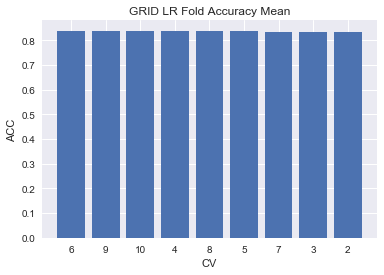

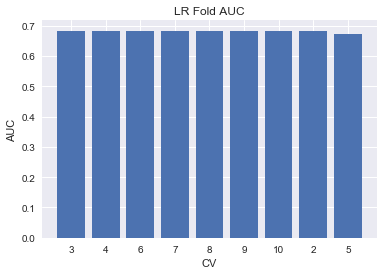

In [427]:
def bar_results(rd, model_name, metric, xlabel, ylabel, title):
    d = dict()

    for result in rd[model_name].keys():
        d[result] = rd[model_name][result][metric]

    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

    x_model = [x[0] for x in s]
    x_value = [x[1] for x in s]

    x = np.arange(len(clfs_results[model_name].keys()))

    f = plt.figure(figsize=(6,4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(x, x_value)
    plt.xticks(x, x_model)
    plt.show()
    
bar_results(clfs_results, 'lr', 'grid_best_score', 'CV', 'ACC', 'GRID LR Fold Accuracy Mean')
bar_results(clfs_results, 'lr', 'best_model_test_auc', 'CV', 'AUC', 'LR Fold AUC')

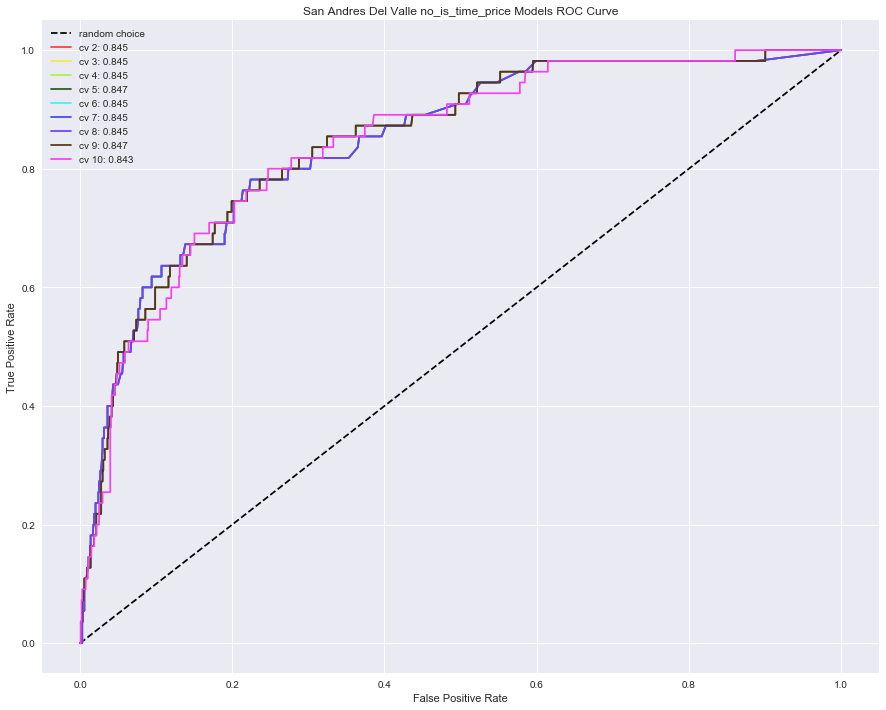

In [579]:
color_sequence = ['#f44242', '#f4eb41', '#acf441', '#285919', '#41f4eb',
                  '#4146f4', '#7041f4', '#593518', '#f441f1', '#f44173']

def roc_battle(clf):
    
    f = plt.figure(figsize=(15,12))
    plt.plot([0, 1], [0, 1], 'k--')
    rank= 0
    legends = ['random choice']
    for key, value in clfs_results[clf].items():
        legends.append('cv %i: %.3f' %(key, clfs_results[clf][key]['best_model_test_auc']))
        y_pred = clfs_results[clf][key]['best_model_test_ypred']
        fpr, tpr, treshold = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, color=color_sequence[rank]) #fpr and tpr
        rank +=1
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_battle_roc_curve.png'.format(dataset_nro, DS_NAME, clf), dpi=300)
    plt.show()

roc_battle('XGB')

In [638]:
model = clfs_results['RF'][8]['grid_best_model']
clf_probas = model.predict_proba(X_test)
# classifier_insights(y_test, clf_probas, model,'XGB', f_importance=True)

In [631]:
results_path = "models_persistance_negocio\\"

folders = os.listdir(results_path)

results_loaded = dict()

for folder in folders:
    files = os.listdir(results_path+folder)
    for file in files[:-1]:
        df = pd.read_excel(results_path+folder+'\\'+file)
        print(file)
#     results_loaded[folder] = dict()

# return {
#     'grid_best_model': grid.best_estimator_,
#     'grid_std': grid_mean_test_score,
#     'grid_best_score': grid.best_score_,
#     'grid_cvresults': grid.cv_results_,
#     'best_model_test_score':best_model.score(X_test, y_test),
#     'best_model_test_yproba': best_model.predict_proba(X_test)[:,1],
#     'best_model_test_auc': roc_auc_score(y_test, y_proba),
#     'best_model_precision': p,
#     'best_model_recall': r,
#     'best_model_fscore': f,
# }

DT_10_grid_compra.xlsx
DT_2_grid_compra.xlsx
DT_3_grid_compra.xlsx
DT_4_grid_compra.xlsx
DT_5_grid_compra.xlsx
DT_6_grid_compra.xlsx
DT_7_grid_compra.xlsx
DT_8_grid_compra.xlsx
DT_9_grid_compra.xlsx
DT_compra_model.joblib
KNN_10_grid_compra.xlsx
KNN_2_grid_compra.xlsx
KNN_3_grid_compra.xlsx
KNN_4_grid_compra.xlsx
KNN_5_grid_compra.xlsx
KNN_6_grid_compra.xlsx
KNN_7_grid_compra.xlsx
KNN_8_grid_compra.xlsx
KNN_9_grid_compra.xlsx
KNN_compra_model.joblib
LR_10_grid_compra.xlsx
LR_2_grid_compra.xlsx
LR_3_grid_compra.xlsx
LR_4_grid_compra.xlsx
LR_5_grid_compra.xlsx
LR_6_grid_compra.xlsx
LR_7_grid_compra.xlsx
LR_8_grid_compra.xlsx
LR_9_grid_compra.xlsx
LR_compra_model.joblib
PCAKNN_10_grid_compra.xlsx
PCAKNN_2_grid_compra.xlsx
PCAKNN_3_grid_compra.xlsx
PCAKNN_4_grid_compra.xlsx
PCAKNN_5_grid_compra.xlsx
PCAKNN_6_grid_compra.xlsx
PCAKNN_7_grid_compra.xlsx
PCAKNN_8_grid_compra.xlsx
PCAKNN_9_grid_compra.xlsx
PCAKNN_compra_model.joblib
RF_10_grid_compra.xlsx
RF_2_grid_compra.xlsx
RF_3_grid_compra.